<a href="https://colab.research.google.com/github/neelkanthrawat/mlph2023-Exercises/blob/main/Copy_of_sheet03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheet 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
### necessary import
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## 2 Projection Trick

(a)

In [ ]:
# Load the data
### path of the files: /content/data2d.npy
xy = np.load('/content/data2d.npy')
### labels file's path in colab: /content/labels.npy
labels = np.load('/content/labels.npy')

# TODO: Plot the data

In [ ]:
from sklearn.linear_model import LogisticRegression
# TODO: fit logistic regression]

# TODO: compute the accuracy

# TODO: visualize the decision boundary

(b)

In [ ]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.

# TODO: Show the enhanced data, e.g. with a 3D scatter plot
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

In [ ]:
# TODO: again, fit and evaluate logistic regression

## 3) Linear regions of MLPs

(a)

In [ ]:
# TODO: define NN architecture
# defining a shalow model with one hidden layer:
shallow_model=nn.Sequential(
    nn.Linear(in_features=2,out_features=20),# I/P size=20, hidden_layer: 20
    nn.ReLU(),# RelU activation for the hidden layer
    nn.Linear(20,1)# O/P layer with one scaler output
)

In [ ]:
print(shallow_model)

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)


In [ ]:
# Generate a dense grid of points
### creating two 1-D arrays representing the coordinates of the x and y axis.
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
###
xv, yv = np.meshgrid(x, y)

# # Plot the 2D grid
### to see what we did in this cell, change 500 above to some smaller value, say 30/50 and then plot it
# plt.scatter(xv, yv, marker='o')
# plt.title('2D Grid Created with np.meshgrid')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.show()

In [ ]:
points = np.column_stack((xv.flatten(), yv.flatten()))### creating a 2d numpy array
# each row of points corresponds to a pair of x-y coordinate matrices 'xv' and 'yv'
print("points is:");print(points)
print("shape of points is:");print(points.shape)
print("___________")

# Convert to PyTorch tensor
input_tensor = torch.tensor(points, dtype=torch.float32)
print("input tensor is:")
print(input_tensor)
print("shape of the input tensor:")
print(input_tensor.shape)

points is:
[[-10.         -10.        ]
 [ -9.95991984 -10.        ]
 [ -9.91983968 -10.        ]
 ...
 [  9.91983968  10.        ]
 [  9.95991984  10.        ]
 [ 10.          10.        ]]
shape of points is:
(250000, 2)
___________
input tensor is:
tensor([[-10.0000, -10.0000],
        [ -9.9599, -10.0000],
        [ -9.9198, -10.0000],
        ...,
        [  9.9198,  10.0000],
        [  9.9599,  10.0000],
        [ 10.0000,  10.0000]])
shape of the input tensor:
torch.Size([250000, 2])


In [ ]:
# Count the number of parameters in the model
num_params = sum(j.numel() for j in shallow_model.parameters())
print(f"Number of parameters in the model: {num_params}")

Number of parameters in the model: 81


shape of predictions before reshaping:
torch.Size([250000, 1])
shape of predictions after reshaping:
torch.Size([500, 500])


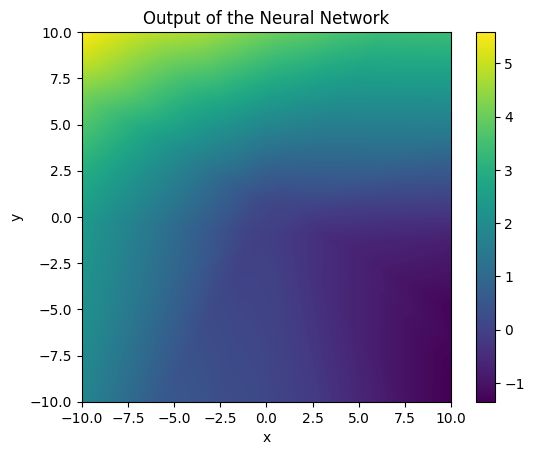

In [ ]:
# Forward pass to get the model predictions
# 'shallow_model(input_tensor)' performs a forward pass through the neural network
# using the generated grid of points as input.
# 'with torch.no_grad(): is used to prevent PyTorch from tracking operations for gradient computation during the forward pass.
# Since we're only interested in obtaining predictions and not in training, this can save memory.
with torch.no_grad():
    predictions = shallow_model(input_tensor)


print("shape of predictions before reshaping:")
print(predictions.shape)

# Reshape the predictions to match the grid
predictions = predictions.view(xv.shape)
print("shape of predictions after reshaping:")
print(predictions.shape)

# Visualize the output as an image
plt.imshow(predictions.numpy(), extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Output of the Neural Network')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Number of parameters in the model: 81
shape of predictions before reshaping:
torch.Size([250000, 1])
shape of predictions after reshaping:
torch.Size([500, 500])


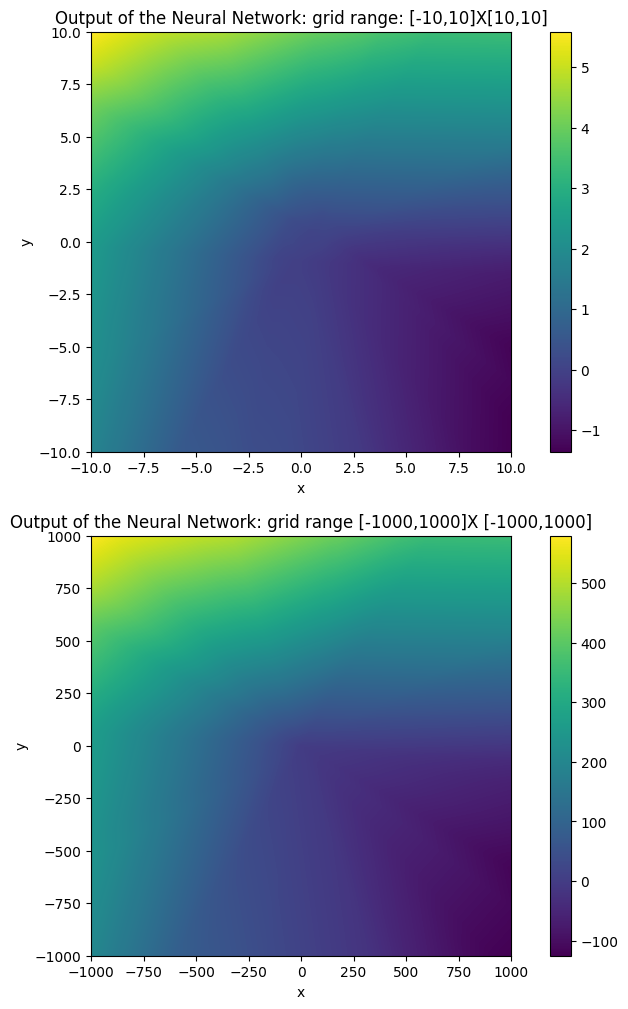

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task
### REPEATING THE TASK 3(b) FOR A LARGER RANGE:
### creating two 1-D arrays representing the coordinates of the x and y axis.

extent2=1000### increasing the range
x2 = np.linspace(-extent2, extent2, 500)
y2 = np.linspace(-extent2, extent2, 500)
###
xv2, yv2 = np.meshgrid(x2, y2)

points2 = np.column_stack((xv2.flatten(), yv2.flatten()))### creating a 2d numpy array
# Convert to PyTorch tensor
input_tensor2 = torch.tensor(points2, dtype=torch.float32)

# Count the number of parameters in the model
num_params2 = sum(j.numel() for j in shallow_model.parameters())
print(f"Number of parameters in the model: {num_params2}")

with torch.no_grad():
    predictions2 = shallow_model(input_tensor2)


print("shape of predictions before reshaping:")
print(predictions2.shape)

# Reshape the predictions to match the grid
predictions2 = predictions2.view(xv2.shape)
print("shape of predictions after reshaping:")
print(predictions2.shape)

# Visualize the output as an image
plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
plt.imshow(predictions.numpy(), extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Output of the Neural Network: grid range: [-10,10]X[10,10]')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,1,2)
plt.imshow(predictions2.numpy(), extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='viridis')
plt.colorbar()
plt.title(f'Output of the Neural Network: grid range [{-extent2},{extent2}]X [{-extent2},{extent2}]')
plt.xlabel('x')
plt.ylabel('y')



plt.show()



(c)

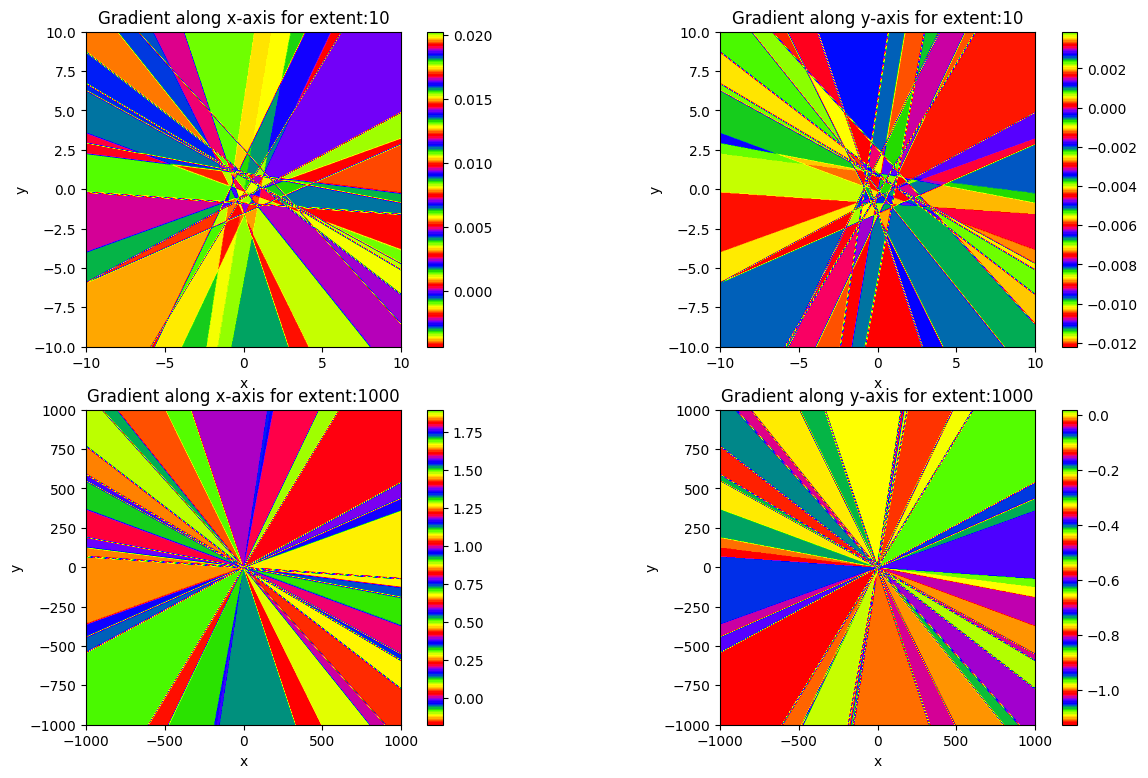

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

# Compute the spatial gradient using numpy.gradient
grad_x, grad_y = np.gradient(predictions)
grad_x2,grad_y2=np.gradient(predictions2)

# Visualize the components of the gradient
fig, axes = plt.subplots(2, 2, figsize=(15, 9))


# Plot the gradient along the x-axis
img0 = axes[0, 0].imshow(grad_x, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 0].set_title('Gradient along x-axis for extent:10')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
plt.colorbar(img0, ax=axes[0, 0])

# Plot the gradient along the y-axis
img1 = axes[0, 1].imshow(grad_y, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 1].set_title('Gradient along y-axis for extent:10')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
plt.colorbar(img1, ax=axes[0, 1])

### extent-2
img2 = axes[1, 0].imshow(grad_x2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 0].set_title(f'Gradient along x-axis for extent:{extent2}')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
plt.colorbar(img2, ax=axes[1, 0])

# Plot the gradient along the y-axis
img3 = axes[1, 1].imshow(grad_y2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 1].set_title(f'Gradient along y-axis for extent:{extent2}')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
plt.colorbar(img3, ax=axes[1, 1])

plt.show()

## 3-(d): Deeper model with 4 hidden layers with 5 neurons each

In [ ]:
# TODO: define NN architecture
# Define the deeper model with four hidden layers
deeper_model = nn.Sequential(
    nn.Linear(2, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Count the number of parameters in the model
num_params = sum(j.numel() for j in deeper_model.parameters())
print(f"Number of parameters in the model: {num_params}")

Number of parameters in the model: 111


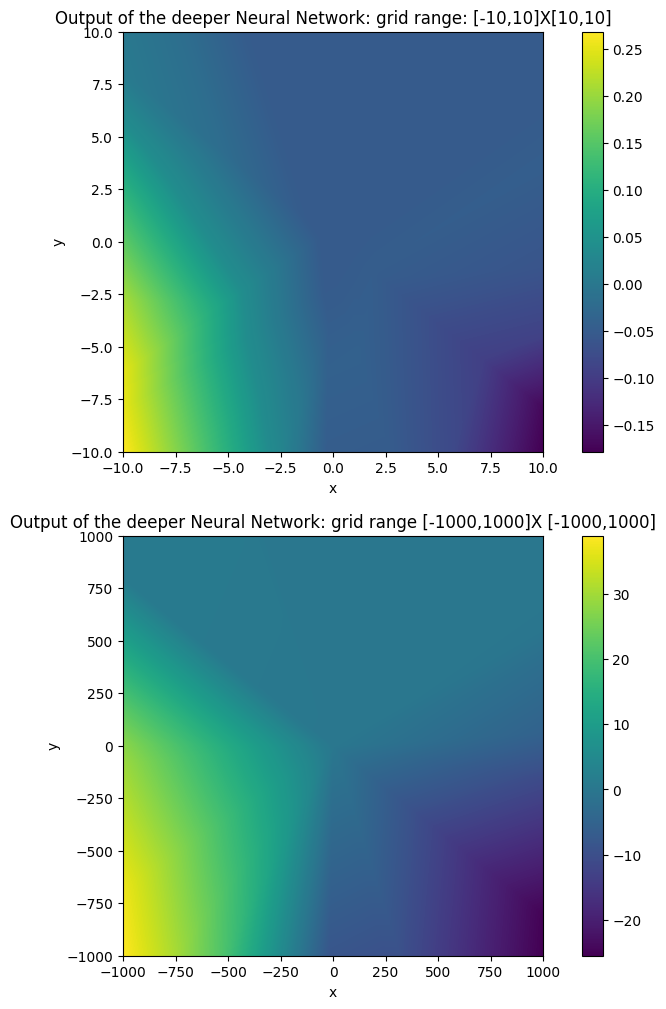

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

# Generate a dense grid of points
# Forward pass to get the model predictions for the deeper model
with torch.no_grad():
    deeper_predictions = deeper_model(input_tensor)
    deeper_predictions2= deeper_model(input_tensor2)

# Reshape the predictions to match the grid
deeper_predictions = deeper_predictions.view(xv.shape)
deeper_predictions2=deeper_predictions2.view(xv2.shape)

#extent=10
######
# Visualize the output as an image
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.imshow(deeper_predictions.numpy(), extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Output of the deeper Neural Network: grid range: [-10,10]X[10,10]')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(2,1,2)
plt.imshow(deeper_predictions2.numpy(), extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='viridis')
plt.colorbar()
plt.title(f'Output of the deeper Neural Network: grid range [{-extent2},{extent2}]X [{-extent2},{extent2}]')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




# ######

# plt.colorbar()
# plt.title('Output of the Deeper Neural Network')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


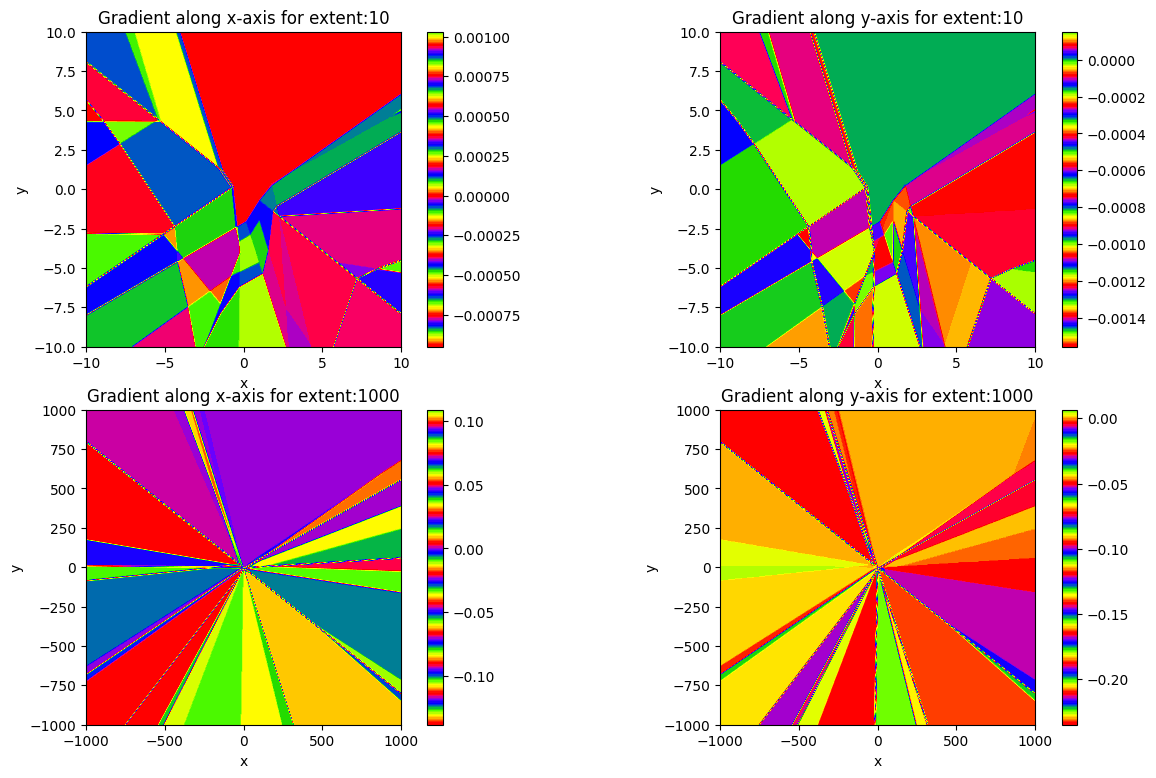

In [ ]:
# Compute the spatial gradient using numpy.gradient
grad_x, grad_y = np.gradient(deeper_predictions)
grad_x2,grad_y2=np.gradient(deeper_predictions2)

# Visualize the components of the gradient
fig, axes = plt.subplots(2, 2, figsize=(15, 9))


# Plot the gradient along the x-axis
img0 = axes[0, 0].imshow(grad_x, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 0].set_title('Gradient along x-axis for extent:10')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
plt.colorbar(img0, ax=axes[0, 0])

# Plot the gradient along the y-axis
img1 = axes[0, 1].imshow(grad_y, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
axes[0, 1].set_title('Gradient along y-axis for extent:10')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
plt.colorbar(img1, ax=axes[0, 1])

### extent-2
img2 = axes[1, 0].imshow(grad_x2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 0].set_title(f'Gradient along x-axis for extent:{extent2}')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
plt.colorbar(img2, ax=axes[1, 0])

# Plot the gradient along the y-axis
img3 = axes[1, 1].imshow(grad_y2, extent=(-extent2, extent2, -extent2, extent2), origin='lower', cmap='prism')
axes[1, 1].set_title(f'Gradient along y-axis for extent:{extent2}')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
plt.colorbar(img3, ax=axes[1, 1])

plt.show()